# Linear Regression Analysis

This project uses linear regression with one variable to predict the death rate per 1,000 residents in a small town in the United States. While this could be done very succinctly with pre-built models and APIs, this exercise goes through the manual process of building a regression model from scratch. Therefore, first we examine our data to better understand the dataset we're working with. Then we use gradient descent with a simple cost function to optimize model parameters. Lastly, we visualize both the results of the regression analysis as well as the sensitivity of the cost function to model parameters, and evaluate statistic significant with hypothesis testing.

The data used in this project comes from a book called *Life in America's Small Cities* by G. Scott Thomas.

## 1. Exploratory Data Analysis

In any machine learning problem, it's important to conduct an exploratory data analysis (EDA) prior to diving in and building / applying ML models. To conduct our EDA here, we will use the pandas library to read in data from a .csv file and the matplotlib library to visualize the data.

### 1.1 Visualizing Correlation

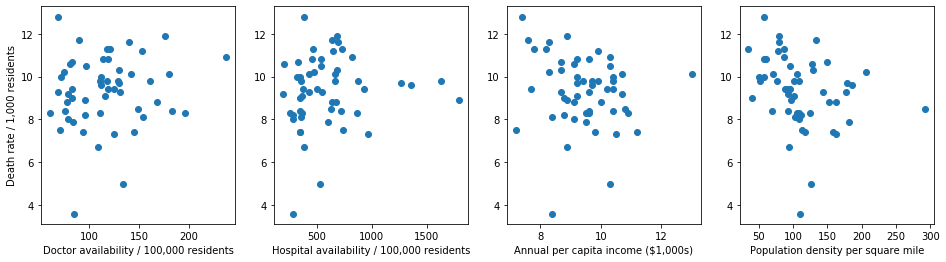

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Set plot space as inline for inline plots and qt for external plots
%matplotlib inline

# Read data from .csv file into pandas dataframe
df = pd.read_csv('health data.csv')
# The columns are: 1 = death rate per 1,000 residents, 2 = doctor availability per 100,000 residents, 
# 3 = hospital availability per 100,000 residents, 4 = annual per capita income in $1,000s, and 
# 5 = population density per square mile
df.columns = ['DR', 'DA', 'HA', 'AI', 'PD']

# Print the first 10 rows to get an idea of what the dataframe looks like
df.head(10)

# Create scatterplots of our data to visually look for linear trends
# Resize the side-by-side scatterplots
plt.figure(figsize=(16,4))
# First plot: death rate as a function of doctor availability
plt.subplot(1, 4, 1)
plt.scatter(df['DA'], df['DR'])
plt.xlabel('Doctor availability / 100,000 residents')
plt.ylabel('Death rate / 1,000 residents')
# Second plot: death rate as a function of hospital availability
plt.subplot(1, 4, 2)
plt.scatter(df['HA'], df['DR'])
plt.xlabel('Hospital availability / 100,000 residents')
# Third plot: death rate as a function of annual per capita income
plt.subplot(1, 4, 3)
plt.scatter(df['AI'], df['DR'])
plt.xlabel('Annual per capita income ($1,000s)')
# Fourth plot: death rate as a function of population density
plt.subplot(1, 4, 4)
plt.scatter(df['PD'], df['DR'])
plt.xlabel('Population density per square mile')
plt.show()

Based solely on the graphs above, we see some evidence of linearity in several plots, but we'll have to test further. Before doing so, however, let's ensure we have a complete dataset.

### 1.2 Check for Completeness

Let's check for completeness in the data. We don't want to build a model only to learn that we had incomplete data and then have to question the validity of what we've built...

In [230]:
conda install -c conda-forge missingno

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\CCOYNE1\AppData\Local\Continuum\anaconda3

  added / updated specs:
    - missingno


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    tbb-2020.1                 |       he980bc4_0         167 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         167 KB

The following NEW packages will be INSTALLED:

  tbb                conda-forge/win-64::tbb-2020.1-he980bc4_0




tbb-2020.1           | 167 KB    |            |   0% 
tbb-2020.1           | 167 KB    | 9          |  10% 
tbb-2020.1           | 167 KB    | ########## | 100% 
tbb-2020.1           | 167 KB    | ########## | 100% 
Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done

Note: you 


The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/win-64::anaconda==2019.07=py37_0
  - defaults/win-64::numba==0.44.1=py37hf9181ef_0


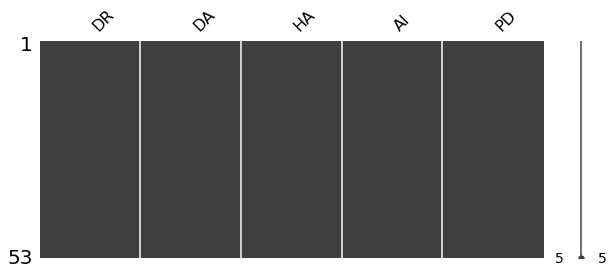

In [103]:
import missingno as mn
mn.matrix(df.sample(len(df['DR'])), figsize=(10,4));

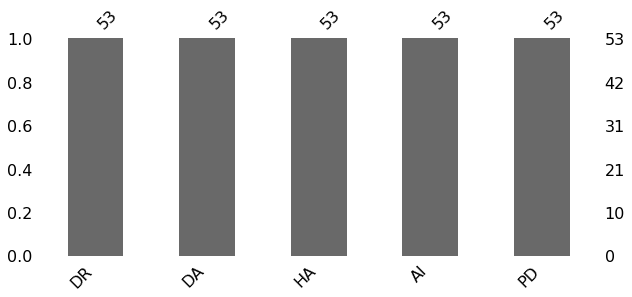

In [104]:
mn.bar(df, figsize=(10,4));

### 1.3 Descriptive Statistics

Therefore, we know we have a complete dataset, with equal number of samples in each column in our dataframe. So let's dive in further and take a look at the distribution of each variable. We want to know if we have a uniform distribution or normal distribution, if we have a large standard deviation or a tight distribution, if we see skewness in the data or not, etc.

Doctor availability / 100,000 residents: mean = 116.09, sdev = 37.53
Hospital availability / 100,000 residents: mean = 589.79, sdev = 329.47
Annual per capita income in $1,000s: mean = 9.44, sdev = 1.07
Population density per square mile: mean = 110.64, sdev = 46.73


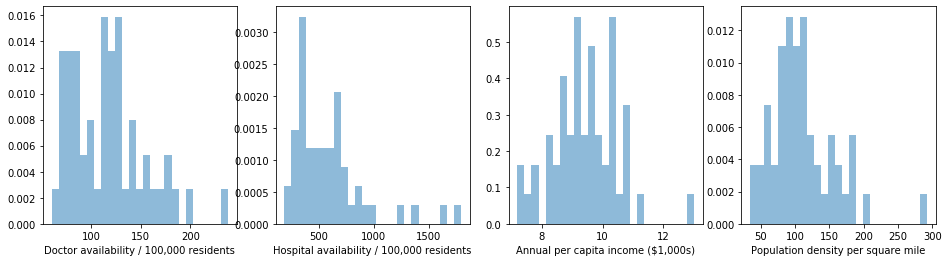

In [105]:
# Determine sample statistics for each variable
from scipy import stats
terms = {'DA':'Doctor availability / 100,000 residents', 'HA':'Hospital availability / 100,000 residents', 
         'AI':'Annual per capita income in $1,000s', 'PD':'Population density per square mile'}
for item in ['DA', 'HA', 'AI', 'PD']:
    m, s = stats.norm.fit(df[item])
    print('{}: mean = {:.2f}, sdev = {:.2f}'.format(terms[item], m, s))

# Create histograms of our data to better understand our inputs
# Resize the side-by-side histograms
plt.figure(figsize=(16,4))
# First plot: death rate as a function of doctor availability
plt.subplot(1, 4, 1)
plt.hist(df['DA'], 25, density=1, alpha=0.5)
plt.xlabel('Doctor availability / 100,000 residents')
# Second plot: death rate as a function of hospital availability
plt.subplot(1, 4, 2)
plt.hist(df['HA'], 25, density=1, alpha=0.5)
plt.xlabel('Hospital availability / 100,000 residents')
# Third plot: death rate as a function of annual per capita income
plt.subplot(1, 4, 3)
plt.hist(df['AI'], 25, density=1, alpha=0.5)
plt.xlabel('Annual per capita income ($1,000s)')
# Fourth plot: death rate as a function of population density
plt.subplot(1, 4, 4)
plt.hist(df['PD'], 25, density=1, alpha=0.5)
plt.xlabel('Population density per square mile')
#plt.title('Scatter Title')
plt.show()

Let's do the same for our output variable, death rate per 1,000 residents.

Death rate / 1,000 residents: mean = 9.31, sdev = 1.65


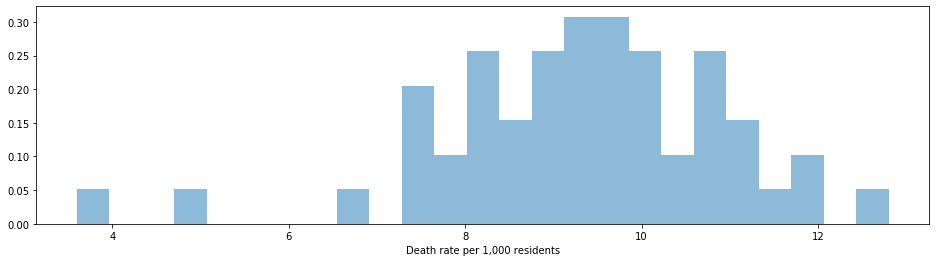

In [106]:
# Determine sample statistics
m, s = stats.norm.fit(df['DR'])
print('Death rate / 1,000 residents: mean = {:.2f}, sdev = {:.2f}'.format(m, s))

plt.figure(figsize=(16,4))
plt.hist(df['DR'], 25, density=1, alpha=0.5)
plt.xlabel('Death rate per 1,000 residents')
plt.show()

Great. Now that we better understand the data, let's begin to construct our univariate linear regression models.

## 2. Setting up the Data

Although we have multiple variables that could be investigated as a linear predictor of death rate per 1,000 residents, let's select **annual per capita income** as our variable of interest first. We'll set up a linear model using annual per capita income as an illustration below, then build similar models for the remaining variables.

A simple univariate linear regression model is built on the hypothesis function shown below, where h(x) is your predicted value, theta is your set of process parameters, and x is your input data.

<img src="2020-12-3 wk2 hypothesis function.PNG" align="center"/>

This linear model uses data (x) and model parameters (theta) to minimize the cost function shown below. In other words, the regression model is adjusting the theta values in order to minimize the amount of error between its predicted values (h(x) shown above) and the actual output found in the data (y).

Briefly, the cost function is summing the error between predicted value and actual value for all data points included in the data set, and squaring the error to ensure positive values. Then it divides by m to achieve an average error value. Finally, it divides by 2 to facilitate adjustment of the process parameters during gradient descent - including division by 2 makes the derivative cleaner, which is used to update the theta values in gradient descent.

<img src="2020-12-3 wk2 cost function.PNG" align="center"/>

As the model above is built on matrix multiplication, we need to convert our vector $x_1$ into a matrix [$x_0$, $x_1$]. Fortunately, this is as simple as adding a column of 1's, as $x_0$ = 1 in the simple hypothesis function above.

In [107]:
df.insert(loc=0, column='x0', value=1)

## 3. Cost and Gradient Descent

First, let's build the cost function shown above.

### 3.1 Cost

In [154]:
def computeCost(x0, x1, y, theta):
    '''
    This is the cost function for a simple linear regression model.
    This function takes in x0, x1, and y as column vectors, and theta
    as a row vector. It then computes the cost, i.e. the amount of error
    between the hypothesis predictions and the actual data.
    '''
    
    # Set up our variables (m = number of samples) and (j = cost)
    m = len(y)
    j = 0

    # Cycle through all data points and sum the error
    for i in range(m):
        h = (theta[0]*x0.iloc[i])+(theta[1]*x1.iloc[i])
        j = j+(h-y.iloc[i])**2
    
    # Divide the sum by 2m
    j = j/(2*m)

    # Return the calculated cost
    return j

We can test this cost function by initializing theta to [0, 0], then computing the cost. We would not expect this to perform well, as these theta values are not optimized.

In [109]:
theta = [0,0]
cost = computeCost(df['x0'], df['AI'], df['DR'], theta)
print("The cost with theta values of [0, 0] is {:.2f}.".format(cost))

The cost with theta values of [0, 0] is 44.65.


### 3.2 Gradient Descent

The cost function is great, but we need something else to help us actually *use* the cost function to optimize our model and minimizing the cost. This is where the **gradient descent** equation comes in. The gradient descent equation uses the difference between your predictions and output data to adjust the theta values in the direction of lower cost. It's an iterative process, and each iteration adjusts the theta values closer to the optimal values that will achieve the lowest cost. 

The alpha variable in the gradient descent equation shown below is known as the "learning rate", and it determines the speed of convergence. A larger alpha value is faster, and a smaller alpha value is slower. However, be mindful! Using an alpha value that's too large can actual result in moving *away* from the minimum cost and therefore model divergence.

<img src="2020-12-3 wk2 gradient descent function.PNG" align="center"/>

Let's first setup a function to convert from pandas series to numpy array to enable matrix multiplication.

In [140]:
def conv_to_np_array(df_col):
    '''
    This is a simple function to convert from a pandas series
    to a numpy array, which will allow for matrix multiplication.
    '''

    # Create a placeholder numpy array
    result = np.array(df_col[0])

    # Add every item of the pandas series to the numpy array
    for item in df_col.values:
        result = np.vstack((result, item))
    
    # Remove the placeholder number we used in the beginning
    result = result[1:]
    
    # Return the result
    return result
    
    #result = np.array(df_col[0])
    #for i in range(1,len(df_col)):
    #    result = np.vstack((result, df_col[i]))
    #return result

Then, we can build the gradient descent function.

In [111]:
def gradientDescent(x0, x1, y, theta, alpha, num_iters):
    '''
    This is the gradient descent function. This function takes in x0,
    x1, y, and theta as column vectors, and the learning rate (alpha) as
    a float, and the number of iterations (num_iters) as an integer.
    At the end of the desired number of iterations, it returns the new
    theta values and the cost history by iteration.
    '''
    
    # Set up our variables (m = number of samples) and (j_history = vector of cost by iteration)
    m = len(y)
    j_history = []

    # In order to conduct matrix multiplication, we need to concatenate our x0 and x1 vectors
    x = np.c_[x0,x1]

    # Over the number of iterations specified, we update the theta parameters and document the associated cost
    for i in range(num_iters):
        h = np.matmul(x, theta)
        diff = h-(conv_to_np_array(y))
        theta = theta - ((alpha/m) * (diff.transpose() @ x).transpose())
        j_history.append(computeCost(x0, x1, y, theta))
    
    return theta, j_history

## 4. Building the Model

Now that we've built our hypothesis, cost, and gradient descent functions, we can build our linear regression model. Below, we feed our learning rate (alpha), desired number of iterations, initial theta values, and our input and output data into the gradient descent function. This function runs gradient descent for the number of iterations specified, then returns the final theta values and the cost history by iteration.

In [186]:
alpha = 0.01
iterations = 1500
theta = np.ones((2,1))
theta[0], theta[1] = 15, -5
j_history = []

theta, j_history = gradientDescent(df['x0'], df['AI'], df['DR'], theta, alpha, iterations)

In [187]:
print("The resulting values are theta_0 = {:.3f} and theta_1 = {:.3f}".format(theta[0].item(), theta[1].item()))

The resulting values are theta_0 = 14.835 and theta_1 = -0.582


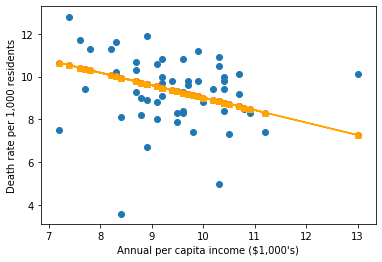

In [188]:
# Create our predicted values
x = np.c_[df['x0'], df['AI']]
pred_x = x@theta

# Create scatterplot of data, including (1) raw data, (2) predicted values, and (3) regression line
# (1) Raw data
plt.scatter(df['AI'], df['DR'])
# (2) Predicted values
plt.scatter(df['AI'], pred_x)
# (3) Regression line
plt.plot(df['AI'], pred_x, c='orange', marker="^")

# Set x and y axes labels
plt.xlabel("Annual per capita income ($1,000's)")
plt.ylabel('Death rate per 1,000 residents')
#plt.title('Scatter Title')
plt.show()

Looking at the scatter plot above, we can tell that our model missed the mark. This is because we left a few outliers in the dataset before building our model. Let's remove those outliers and run the model again. We would expect to see the death rate *decrease* with an increase in annual per capita income, but let's see what happens with a cleaned dataset.

In [189]:
# Eliminate the outliers at high annual per capita income values with high death rates
df_AI = df.loc[(df['AI'] < 12)]
df_AI = df_AI.loc[df['DR'] > 6]

In [190]:
# Set up our model inputs
alpha = 0.01
iterations = 1500
theta = np.ones((2,1))
theta[0], theta[1] = 15, -5
j_history = []

# Run gradient descent to optimize our theta values
theta, j_history = gradientDescent(df_AI['x0'], df_AI['AI'], df_AI['DR'], theta, alpha, iterations)

# Print the results
print("The resulting values are theta_0 = {:.3f} and theta_1 = {:.3f}".format(theta[0].item(), theta[1].item()))

The resulting values are theta_0 = 15.213 and theta_1 = -0.609


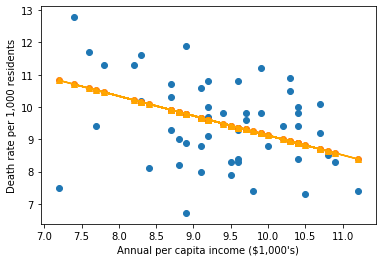

In [191]:
# Create our predicted values based on the optimized theta values
x = np.c_[df_AI['x0'], df_AI['AI']]
pred_x = x@theta

# Create scatterplot of data, including (1) raw data, (2) predicted values, and (3) regression line
# (1) Raw data
plt.scatter(df_AI['AI'], df_AI['DR'])
# (2) Predicted values
plt.scatter(df_AI['AI'], pred_x)
# (3) Regression line
plt.plot(df_AI['AI'], pred_x, c='orange', marker="^")

# Set x and y axes labels
plt.xlabel("Annual per capita income ($1,000's)")
plt.ylabel('Death rate per 1,000 residents')
plt.show()

### 4.1 Predicting with the Model

Now that our linear regression model is constructed, we can use it to predict Y based on X. Let's do a couple examples below.

In [192]:
# Example 1: x = 15
x_ex1 = np.array([1,7])
prediction = x_ex1 @ theta
print("With an x-value of {:.1f}, we would expect a y-value of {:.3f}".format(x_ex1[1], prediction.item()))

# Example 2: x = 25
x_ex2 = np.array([1,9])
prediction = x_ex2 @ theta
print("With an x-value of {:.1f}, we would expect a y-value of {:.3f}".format(x_ex2[1], prediction.item()))

# Example 1: x = 35
x_ex3 = np.array([1,11])
prediction = x_ex3 @ theta
print("With an x-value of {:.1f}, we would expect a y-value of {:.3f}".format(x_ex3[1], prediction.item()))

With an x-value of 7.0, we would expect a y-value of 10.948
With an x-value of 9.0, we would expect a y-value of 9.730
With an x-value of 11.0, we would expect a y-value of 8.511


### 4.2 Visualizing the Cost Function

To get a better understanding of what our gradient descent function actually did, let's map the cost function onto a 3D surface plot with axes $theta_0$ and $theta_1$. Below, we calculate the cost for $theta_0$ values between -10 and 10 and $theta_1$ values between -1 and 4.

In [193]:
# Map theta0 from -10 to 10 in 100 increments
theta0_vals = np.arange(10, 20, 0.1)

# Map theta1 from -1 to 4 in 100 increments
theta1_vals = np.arange(-3, 2, 0.05)

# Initialize our results matrix and calculate the cost across theta0 and theta1 values
Z = np.ones((100,100))

# Note that the for loop below may take some time
for i in range(100):
    for j in range(100):
        Z[i][j] = computeCost(df_AI['x0'], df_AI['AI'], df_AI['DR'], [theta0_vals[i],theta1_vals[j]])

Now that we've generated our response surface, it's just a matter of visualizing it with the plotly library. Let's install plotly, then use it to create our surface plot.

In [231]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [229]:
import plotly
import plotly.graph_objects as go

# Set up our figure using our surface Z
t0, t1 = np.meshgrid(theta0_vals, theta1_vals)
fig = go.Figure(data=[go.Surface(z=Z, x=t0, y=t1)])
fig.update_layout(title='Cost Function Surface Plot', autosize=False,
                  width=800, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))

# Show the surface plot
fig.show()

*(Hint: use your mouse to spin the graph above! It's interactive.)*

While the graphic above is nice, it's still a little difficult to identify where the cost function minimum is exactly and where our theta solution lies. Therefore, let's try something else: let's build a 2D contour plot of the same data. We do this below, and we add a white "x" to mark where our set of theta values falls on the contour plot.

Text(0, 0.5, 'theta_1')

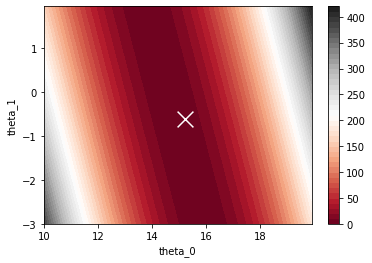

In [207]:
plt.contourf(t0, t1, Z, 50, cmap="RdGy")
plt.colorbar()
plt.scatter(theta[0].item(), theta[1].item(), s=250, c='white', marker="x")
plt.xlabel('theta_0')
plt.ylabel('theta_1')

As we can see from the contour plot above, our set of theta values did not achieve *perfectly* optimal settings to minimize the cost function, but it's close. This is due either to (1) our learning rate being too large, which doesn't allow our theta values to converge to the cost function minimum, or (2) not enough iterations. To solve (1), there is a common strategy of adjusting the learning rate as the solution approaches the optimal settings to ensure that you finally arrive at the cost function minimum (or at least very close to it). To solve (2), we would simply need to run more iterations.

We can evaluate our resulting theta values another way. Remember that the gradient descent function recorded the cost history of each iteration. We can therefore plot the cost against iteration to ensure we're moving towards a continuously better solution with each pass through the gradient descent function. This is done below.

Text(0, 0.5, 'Cost')

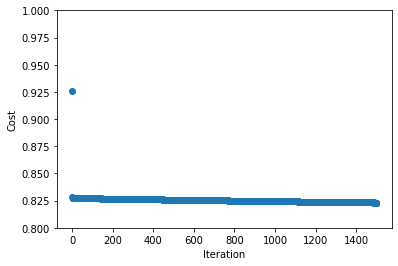

In [210]:
i_list = [i for i in range(iterations)]
j_hist = []
for i in range(iterations):
    j_hist.append(j_history[i].item())
plt.scatter(i_list, j_hist)
plt.ylim(0.8,1)
plt.xlabel('Iteration')
plt.ylabel('Cost')

The plot above would suggest that we need to allow our learning rate to adjust as our theta values get closer to the optimal solution.

## 5. Statistical Evaluation

Great, now we have some results that look good. How confident are we in our regression? We need to do some statistical analysis to find out. First, let's state our null and alternate hypothesis:


$H_0$: the slope of the regression line is equal to 0 (no relationship between variables)

$H_a$: the slope of the regression line is not equal to 0 (linear relationship between variables)


Below, we start with the standard error and the degrees of freedom. From there, we calculate a t-statistic, from which we can determine our p-value. We'll use a significance level of alpha =  0.05, meaning if we see anything more than a 5% chance that our observations could be due to chance (i.e. p-value > 0.05), we will fail to reject the null hypothesis. On the other hand, if p < 0.05, we will reject the null hypothesis.

<img src="2020-12-3 wk2 se function.PNG" align="center"/>

<img src="2020-12-3 wk2 dof function.PNG" align="center"/>

<img src="2020-12-3 wk2 t function.PNG" align="center"/>

In [227]:
# Calculate degrees of freedom
dof = len(df_AI['AI'] - 2)

# Calculate standard error
cost = computeCost(df['x0'], df['AI'], df['DR'], theta)
num = (len(df_AI['AI'] * cost)) / dof
       
xs = 0
for item in df_AI['AI']:
    xs = xs + (item - df_AI['AI'].mean())**2
denom = xs**(1/2)

se = num / denom
       
# Calculate t-statistic
t = theta[1] / se
      
# Calculate p-value
p = stats.t.cdf(t, df=dof)
       
print("dof = {}, se = {:.2f}, t = {:.2f}, p-value = {}".format(dof, se, t.item(), p.item()))

dof = 50, se = 0.15, t = -4.10, p-value = 7.476368246664837e-05


Therefore, we are statistically confident at an alpha level of 0.05 that there is a linear relationship between the annual per capita income and the death rate per 1,000 residents.

## 6. Conclusions

What did we do in this project, and what are our conclusions? Let's recap.

**1. EDA:** First, we conducted an exploratory data anlysis. We looked at the distribution of each variable, we examined scatterplots of each x-variable plotted against our y-variable, and we checked the dataset for completeness. We also calculated descriptive statistics to better understand our dataset.

**2. Setup:** Then, we established the equations that we were going to use to build our linear regression model, and formatted the data accordingly. This entailed adding a column for x0 to our dataframe.

**3. Cost & Gradient Descent:** In this section, we built the underpinnings of the model by developing a function that we could call to calculate the cost (based on our theta values) and use gradient descent to move our theta values towards the optimal values. These two functions are the key enablers in building the regression model.

**4. Build the Model:** Once all the upfront leg work was complete, we built the model! We tried this once, then found there were a few outliers that we should eliminate before proceeding. We took those outliers out, then rebuilt the regression model with the remaining dataset. Then we used the model we built to predict death rate per 1,000 residents based on example input annual per capita income values. Finally, we visualized the cost function in a variety of ways to (1) ensure our gradient descent algorithm worked its way appropriately towards a solution and (2) better understand the model.

**5. Stats:** Lastly, we used hypothesis testing to determine whether or not the results that we calculated were statistically significant. We concluded that the results were significant with an alpha level of 0.05.